<a href="https://colab.research.google.com/github/Marlenijournal/S6MLP6_Decision-Tree/blob/main/Pral_ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marleni Sukarya
# NIM : 1227050069
# Prak. ML H

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/kvinlazy/Dataset/master/drug200.csv'
df = pd.read_csv(url)

print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

print(df.head())

   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


In [ ]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[ 4  0  0  0  0]
 [ 2  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 27]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        27

    accuracy                           0.97        60
   macro avg       0.93      0.93      0.92        60
weighted avg       0.98      0.97      0.97        60



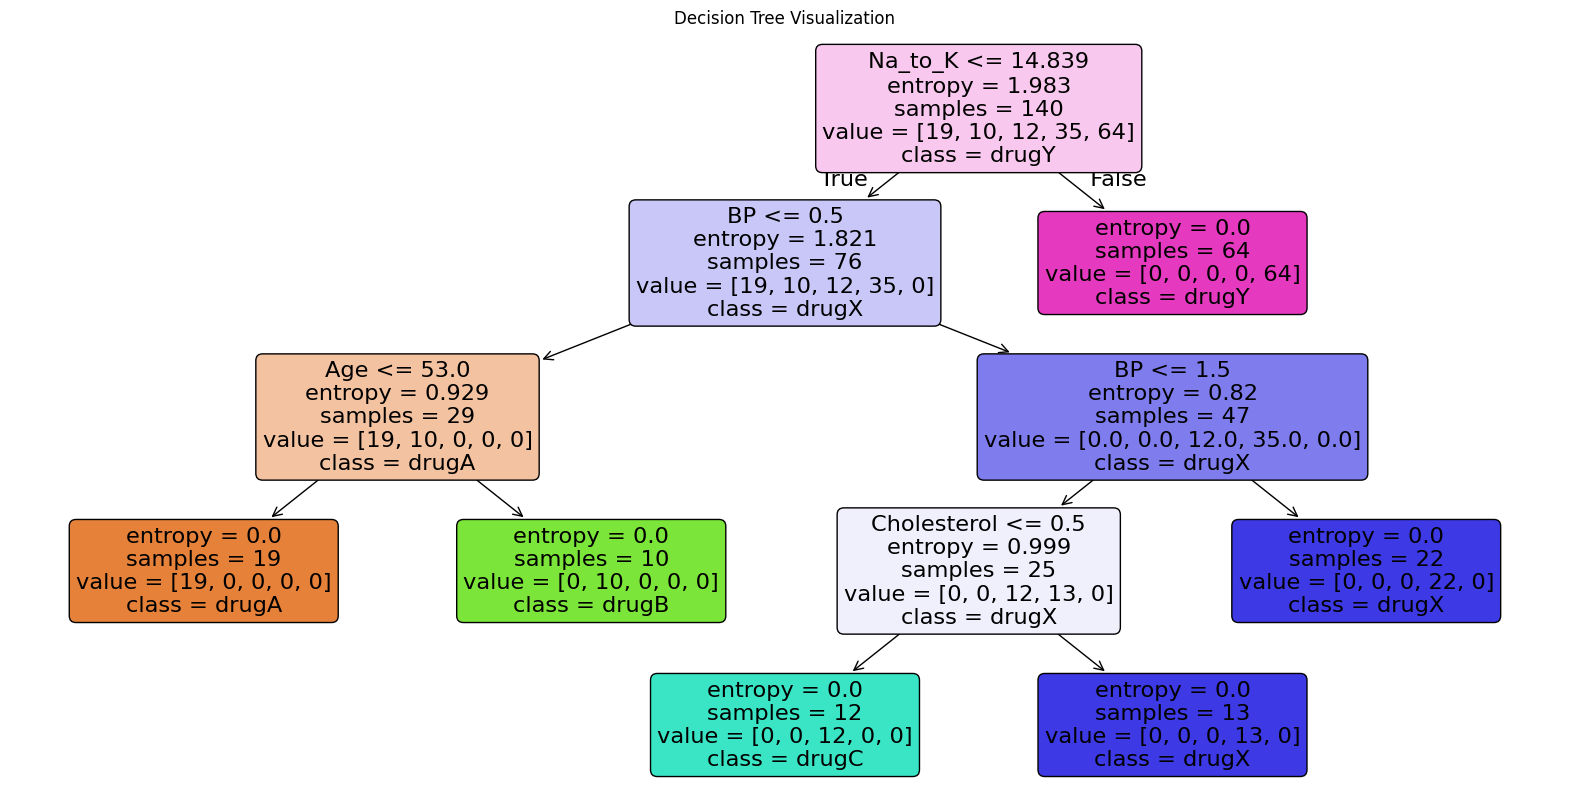

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,
               feature_names=X.columns,
               class_names=le.inverse_transform(sorted(y.unique())),
               filled=True,
               rounded=True)
plt.title("Decision Tree Visualization")
plt.show()